# 1. Install twixtools and replace the original twix_map.py with the one modified by Chong
https://github.com/OSU-MR/Python_read_Siemens_rawdata

In [1]:
#this cell will install the modified version of twixtools for you
from surface_coil_intensity_correction.download_data import download_file_from_figshare, install_twixtools 

# Execute the installation process
install_twixtools()

please read README.md to run the code.
The code is still under development.
plesae contact me for adding more data shape support.
lei.337@osu.edu
Extracting the zip file...
Replacing twix_map.py...
File saved as map_twix.py
Sufficient numpy version is already installed.
Installing twixtools...
Processing /home/Xuan/SCIC/twixtools-master
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for twixtools: filename=twixtools-1.0-py3-none-any.whl size=51387 sha256=e9e112d98d4332f963695165efeebb110657d12e0c341d07b16418902ed126d7
  Stored in directory: /home/Xuan/.cache/pip/wheels/9e/17/7f/c4a46d0f5b8dace8e469bdd767b5d26fe895f4db05f9626349
Successfully built twixtools
  Attempting uninstall: twixtools
    Found existing installation: twixtools 1.0
    Uninstalling twixtools-1.0:
      Successfully uninstalled twixtools-1.0
Removing the zip file and the extracted directory...
Installing numpy==1.23.4...
Installing sigpy==0.1.25.

# 2. Organize the folders of your datasets
# **The sturcture of your dataset folders should be like this:**
<style>
code {
    font-size: 15px;
}
</style>
```markdown


base_dir-----input_folder-----folder name of your datasets_1
          |                |--folder name of your datasets_2
          |                |              ...
          |		        --folder name of your datasets_n
          |
          |
          | (folders below will be automatically created)
          ---output_folder------correction map folder of your datasets_1    
			     |--correction map folder of your datasets_2         
			     |                ...                 
                 ---correction map folder of your datasets_n

```

**This cell will automatically download the data from the server and create the folder structure under the current directory**

In [2]:
#This cell will automatically download the data from the server and create the folder structure under the current directory**
import os
from surface_coil_intensity_correction.download_data import download_file_from_figshare
# Path: ./data
#create base directory
os.makedirs('./data', exist_ok=True)

#create subdirectories
os.makedirs('./data/rawdata', exist_ok=True)
os.makedirs('./data/rawdata/dataset_demo', exist_ok=True)

#download the data
saving_path = './data/rawdata/dataset_demo/'
url_2CH = "https://figshare.com/ndownloader/files/41881158"
url_SAX = "https://figshare.com/ndownloader/files/41915115"

print("Demo datasets are being downloaded please wait......")
download_file_from_figshare(saving_path,url_2CH)
#if we are using free version of colab then we do not download SAX view dataset since you may face the running out of RAM issue
if 'google.colab' not in str(get_ipython()):
    download_file_from_figshare(saving_path,url_SAX)

Demo datasets are being downloaded please wait......
File saved as meas_MID00091_FID54254_DE_TRUFI_2CH_MOCO_30avg.dat
File saved as meas_MID00221_FID94179_DE_TRUFI_SAX_MOCO_30avg.dat


# 3. Import the functions and define the folders

In [3]:
from surface_coil_intensity_correction.brightness_correction import getting_and_saving_correction_map, create_and_start_threadings, displaying_results
base_dir = "./data"
input_folder = "rawdata"
output_folder = "correction_maps_demo"
input_folder_names = ['dataset_demo'] #set this to None, if you want to go through all the folders in the input_folder

# 4. Define custom function for user defined processing

In [4]:
import numpy as np
def rms_comb(sig, axis=1):
    return np.sqrt(np.sum(abs(sig)**2, axis))

def CustomProcedure(img_body_coils, img_surface_coils, ksp, ref_padded, noise_kspace, dim_info_noise):

    # print('img_body_coils.shape', img_body_coils.shape)
    # print('img_surface_coils.shape', img_surface_coils.shape)
    # print('ksp.shape', ksp.shape)
    # print('ref_padded.shape', ref_padded.shape)
    # print('noise_kspace.shape', noise_kspace.shape)
    # print('dim_info_noise.shape', dim_info_noise.shape)

    img_body_coils = rms_comb(img_body_coils,0)
    img_surface_coils = rms_comb(img_surface_coils,0)

    #set Stop to True to stop the program for debugging
    Stop = False
    assert not Stop, "Stopped for debugging"
    
    return img_body_coils, img_surface_coils , ksp, ref_padded

# 5. Start the correcting

In [5]:
num_thread = 1 # define the number of threads
threads = create_and_start_threadings(num_thread, getting_and_saving_correction_map, base_dir, 
                                      input_folder, output_folder, input_folder_names, 
                                      auto_rotation='LGE',debug = True,
                                      apply_correction_during_sense_recon=False,CustomProcedure=CustomProcedure)

import time

while True:
    alive_flag = False
    for i in range(len(threads)):
        alive_flag = alive_flag or threads[i].is_alive()
    if alive_flag is False:
        break
    time.sleep(0.5)
print("All threads have finished their jobs!")

Thread 0 has been created! please wait until it finishes!
Software version: VD/VE (!?)

Scan  0


100%|███████████████████████████████████████| 63.4M/63.4M [00:00<00:00, 464MB/s]


WARNING more than one slice. Taking first one..
Scan  1


100%|██████████████████████████████████████| 4.73G/4.73G [00:03<00:00, 1.68GB/s]



number of separate scans (multi-raid): 2
dim_info_org
 ['Set', 'Sli', 'Ave', 'Lin', 'Cha', 'Col'] 
 (2, 8, 30, 150, 34, 512)
multiple sets
original data shape: (2, 32, 32, 34, 128)
['Set', 'Par', 'Lin', 'Cha', 'Col']
(2, 32, 32, 34, 128)
1 1
arranged data shape (128, 32, 32, 34, 2, 1, 1)
['RO', 'E1', 'E2', 'Cha', 'Set', 'S', 'Sli']
3d image shape: (128, 32, 32, 34, 2)
custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

Software version: VD/VE (!?)

Scan  0


100%|███████████████████████████████████████| 56.2M/56.2M [00:00<00:00, 418MB/s]


Scan  1


100%|████████████████████████████████████████| 535M/535M [00:00<00:00, 1.58GB/s]



number of separate scans (multi-raid): 2
dim_info_org
 ['Set', 'Ave', 'Lin', 'Cha', 'Col'] 
 (2, 30, 150, 30, 512)
multiple sets
original data shape: (2, 32, 32, 30, 128)
['Set', 'Par', 'Lin', 'Cha', 'Col']
(2, 32, 32, 30, 128)
1 1
arranged data shape (128, 32, 32, 30, 2, 1, 1)
['RO', 'E1', 'E2', 'Cha', 'Set', 'S', 'Sli']
3d image shape: (128, 32, 32, 30, 2)
Dimension 'Sli' not found, skipping.
custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

Thread 0 is done! You can find the results in the output folder! You can also display the results by using the function displaying_results(). Please check cells below!
All threads have finished their jobs!


# 6. For displaying the result, use **displaying_results()** function like this:

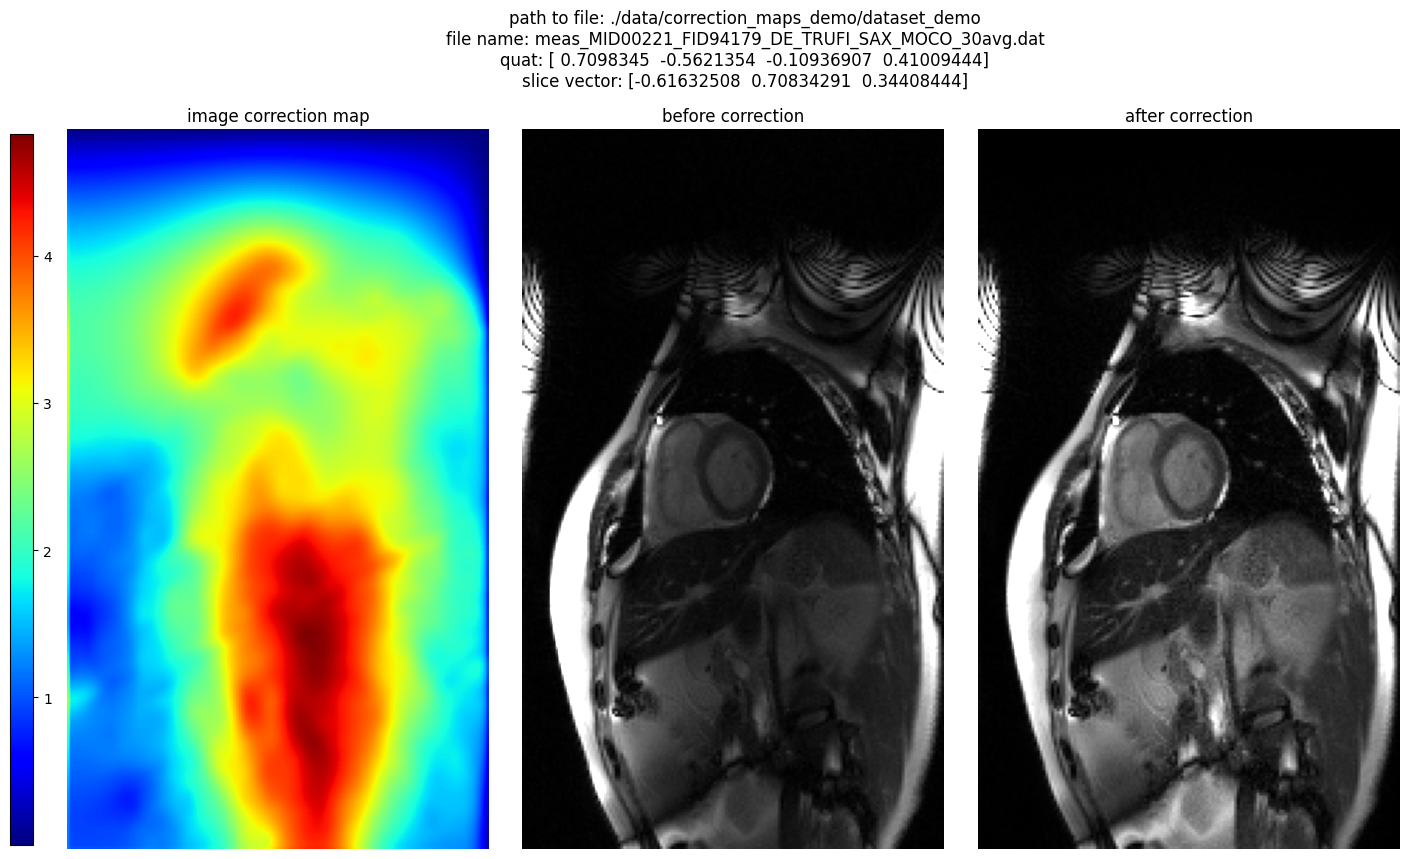

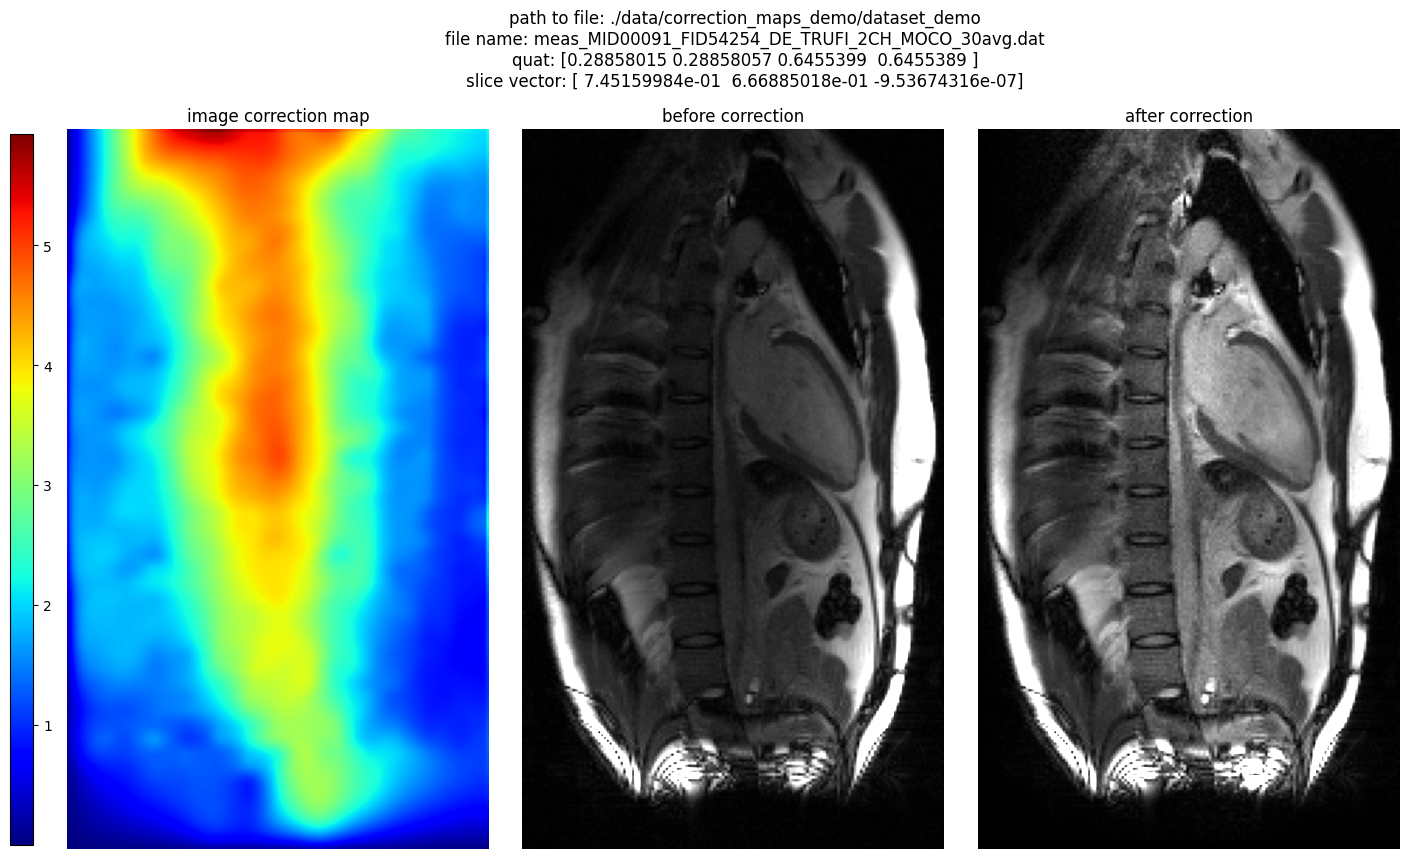

In [6]:
sli_idx = 0 #changing this number will show different slices
output_folder_names = ['dataset_demo']
output_folder = "correction_maps_demo"
displaying_results(base_dir=base_dir, input_folder=input_folder,
                   output_folder=output_folder, folder_names=output_folder_names, sli_idx=sli_idx,
                   fig_h=9, debug=False) #set debug = True to display more information


# 7. Set **apply_correction_during_sense_recon = True** to apply the correction during the sense reconstruction

In [7]:
num_thread = 1 # define the number of threads
threads = create_and_start_threadings(num_thread, getting_and_saving_correction_map, base_dir, 
                                      input_folder, output_folder, input_folder_names, 
                                      auto_rotation='LGE',debug = True,
                                      apply_correction_during_sense_recon=True,CustomProcedure=CustomProcedure)

while True:
    alive_flag = False
    for i in range(len(threads)):
        alive_flag = alive_flag or threads[i].is_alive()
    if alive_flag is False:
        break
    time.sleep(0.5)
print("All threads have finished their jobs!")

Thread 0 has been created! please wait until it finishes!
Software version: VD/VE (!?)

Scan  0


100%|███████████████████████████████████████| 63.4M/63.4M [00:00<00:00, 732MB/s]


WARNING more than one slice. Taking first one..
Scan  1


100%|██████████████████████████████████████| 4.73G/4.73G [00:03<00:00, 1.64GB/s]



number of separate scans (multi-raid): 2
dim_info_org
 ['Set', 'Sli', 'Ave', 'Lin', 'Cha', 'Col'] 
 (2, 8, 30, 150, 34, 512)
multiple sets
original data shape: (2, 32, 32, 34, 128)
['Set', 'Par', 'Lin', 'Cha', 'Col']
(2, 32, 32, 34, 128)
1 1
arranged data shape (128, 32, 32, 34, 2, 1, 1)
['RO', 'E1', 'E2', 'Cha', 'Set', 'S', 'Sli']
3d image shape: (128, 32, 32, 34, 2)
custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

Software version: VD/VE (!?)

Scan  0


100%|███████████████████████████████████████| 56.2M/56.2M [00:00<00:00, 764MB/s]


Scan  1


100%|████████████████████████████████████████| 535M/535M [00:00<00:00, 1.95GB/s]



number of separate scans (multi-raid): 2
dim_info_org
 ['Set', 'Ave', 'Lin', 'Cha', 'Col'] 
 (2, 30, 150, 30, 512)
multiple sets
original data shape: (2, 32, 32, 30, 128)
['Set', 'Par', 'Lin', 'Cha', 'Col']
(2, 32, 32, 30, 128)
1 1
arranged data shape (128, 32, 32, 30, 2, 1, 1)
['RO', 'E1', 'E2', 'Cha', 'Set', 'S', 'Sli']
3d image shape: (128, 32, 32, 30, 2)
Dimension 'Sli' not found, skipping.
custom procedure found and used!
apply_correction_during_sense_recon:  True


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

Thread 0 is done! You can find the results in the output folder! You can also display the results by using the function displaying_results(). Please check cells below!
All threads have finished their jobs!


# 8. Set **debug = True** to display the all results generated above

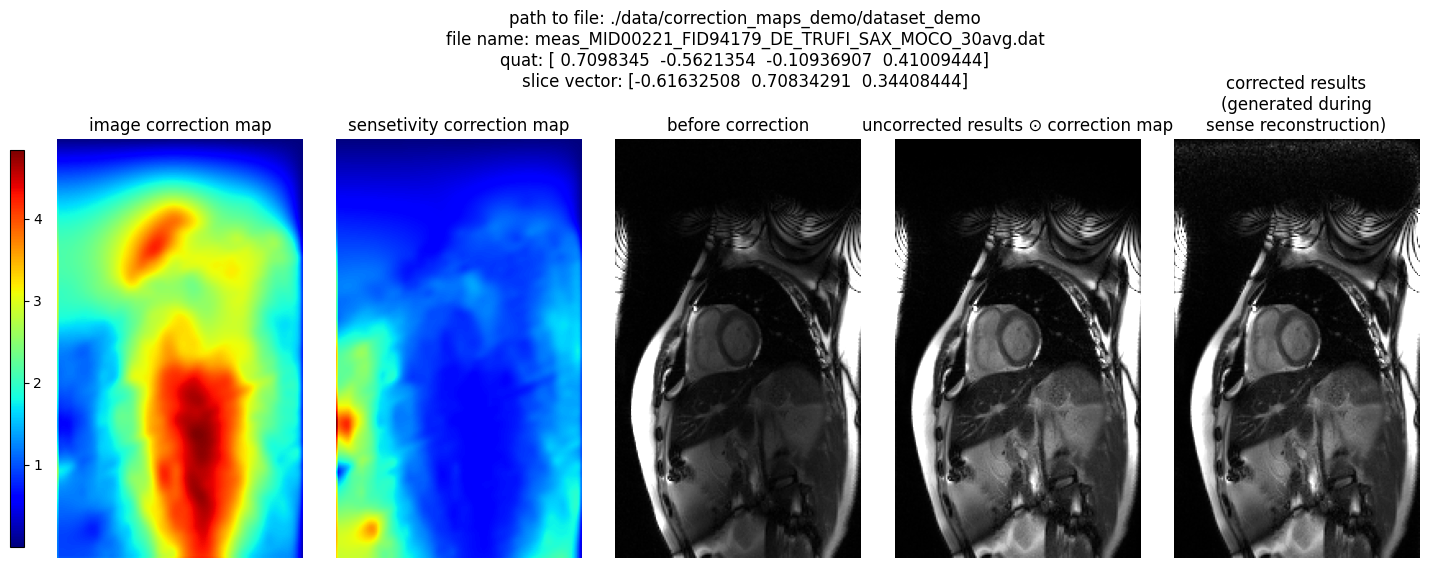

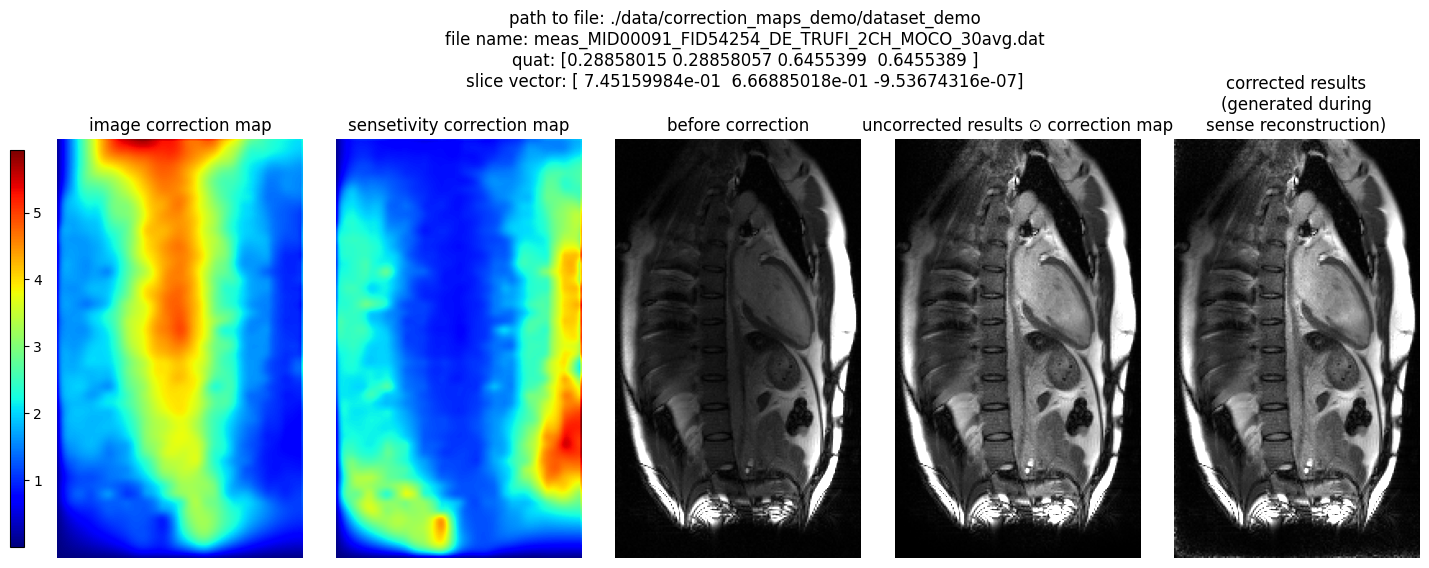

In [8]:
output_folder_names = ['dataset_demo']
output_folder = "correction_maps_demo"
displaying_results(base_dir=base_dir, input_folder=input_folder,
                   output_folder=output_folder, folder_names=output_folder_names, sli_idx=0,
                   fig_h=9, debug=True) #set debug = True to display more information